#       LEAD SCORING CASE STUDY
                                                      PREPARED BY: S.SOWJANYA
                                                      BATCH NO: DS  C52

# Data Understanding

In [1]:
# Surpass the warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Expand the display
pd.set_option('display.max_columns', 500)

In [4]:
# Model Building libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# Model Evalutaion
from sklearn import metrics


In [6]:
# Read the data
lead = pd.read_csv("Leads.csv", sep=",", encoding="ISO-8859-1", header=0)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- Prospect ID, Lead Number is unique identification number. This will not help in model building.

In [7]:
lead.shape

(9240, 37)

In [8]:
# Statistics analysis of data -
lead.describe(percentiles=[0.1,0.2,0.3,0.5,0.75,0.9,0.95,0.99,1])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
10%,586361.700000,0.000000,0.000000,0.000000,0.000000,13.000000,15.000000
20%,592772.800000,0.000000,0.000000,0.000000,0.000000,13.000000,15.000000
30%,600313.400000,0.000000,2.000000,57.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000


- There are no outliers in the data.

In [9]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# Check for duplicates
lead[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


- There are no duplicates in the data frame.

In [11]:
# Check percentage of null values per colunms :
round(lead.isna().mean().sort_values(ascending=False)*100,2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [12]:
# Checking pearson correlation of continuous variable with the columns containing more than 30 % missing values -
lead [["Asymmetrique Profile Score", "Asymmetrique Activity Score", "Converted"]].corr()

,Asymmetrique Profile Score,Asymmetrique Activity Score,Converted
Asymmetrique Profile Score,1.000000,-0.123250,0.218571
Asymmetrique Activity Score,-0.123250,1.000000,0.167962
Converted,0.218571,0.167962,1.000000


- Low correlation of both the variable with target variable, hence discard the values.

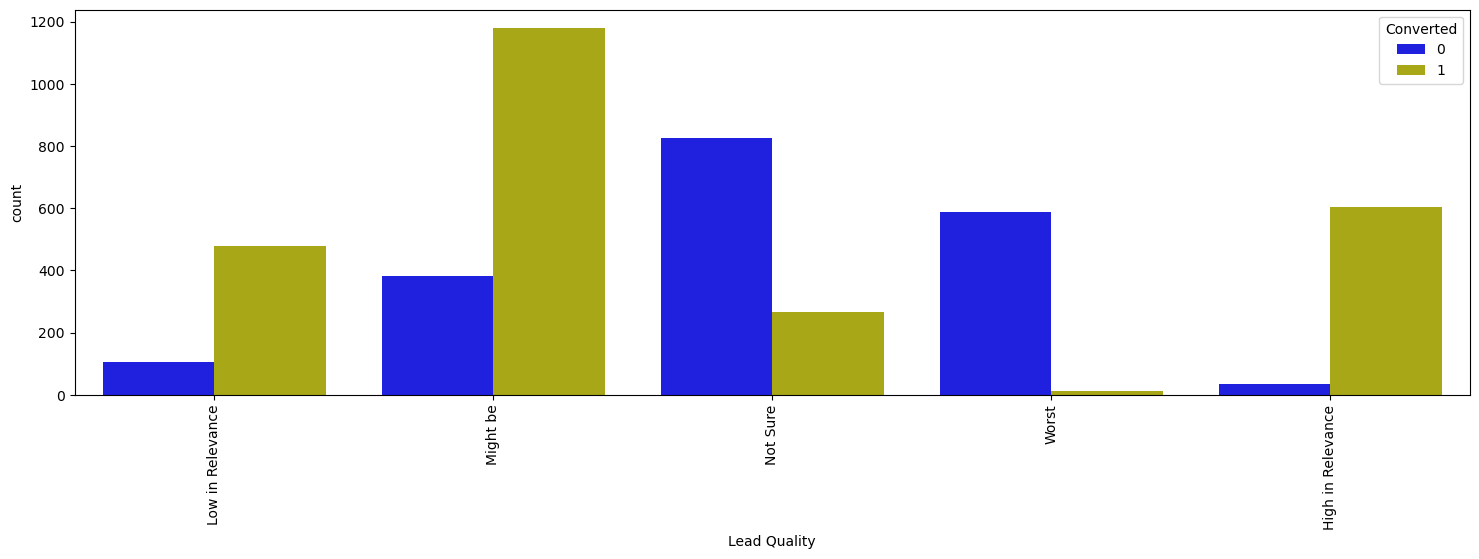

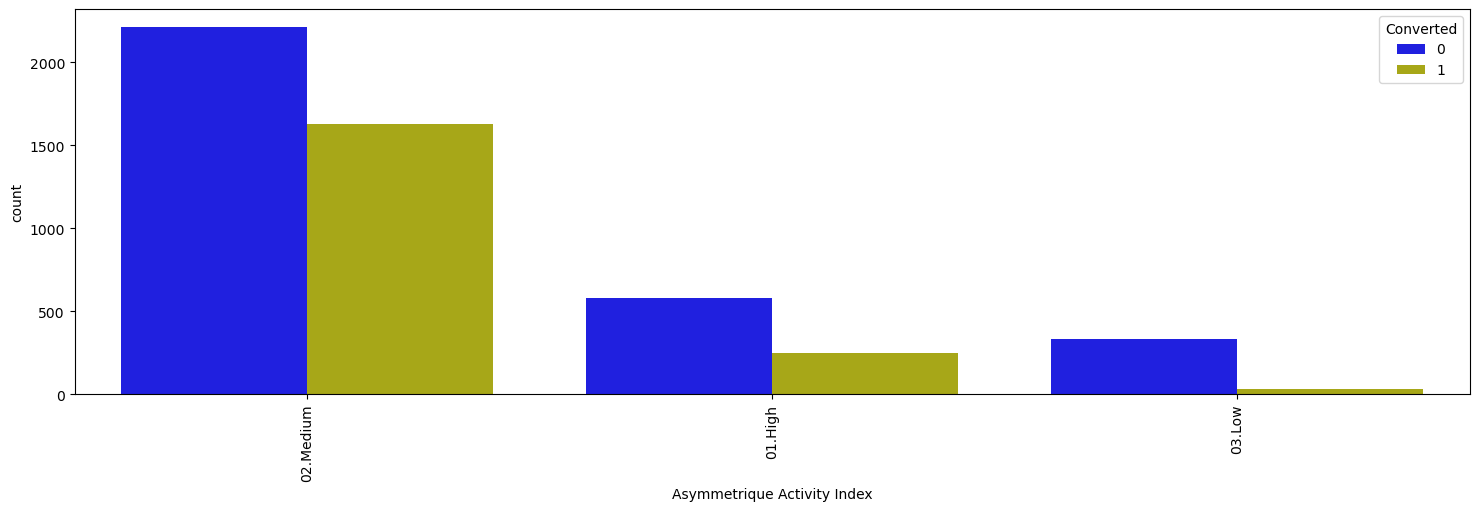

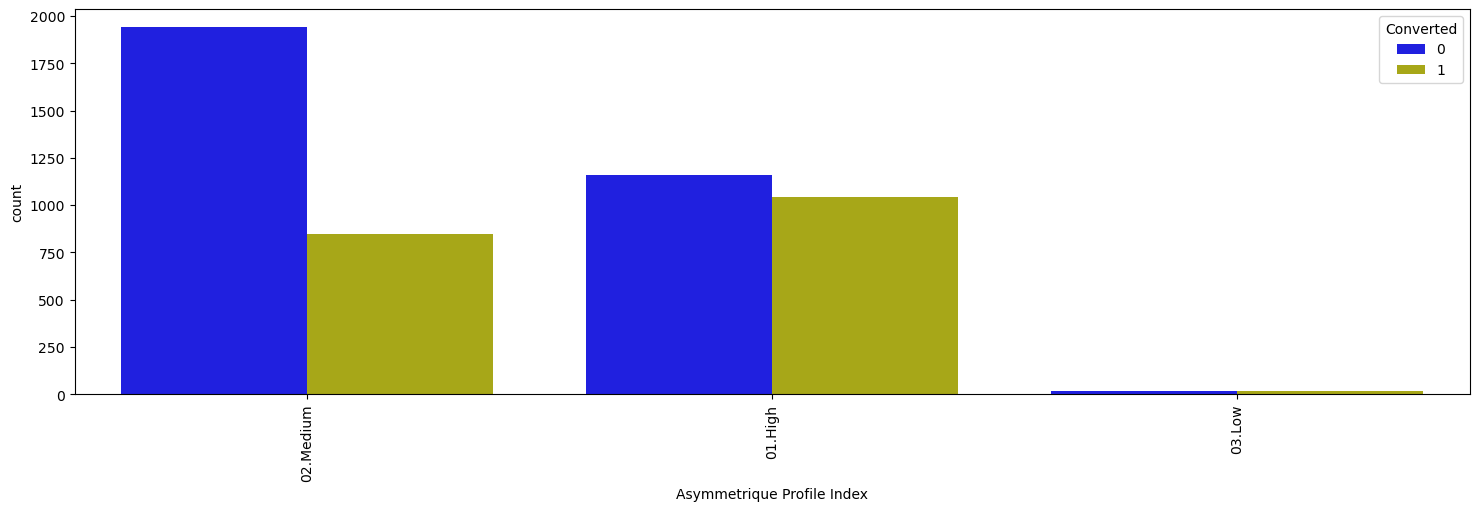

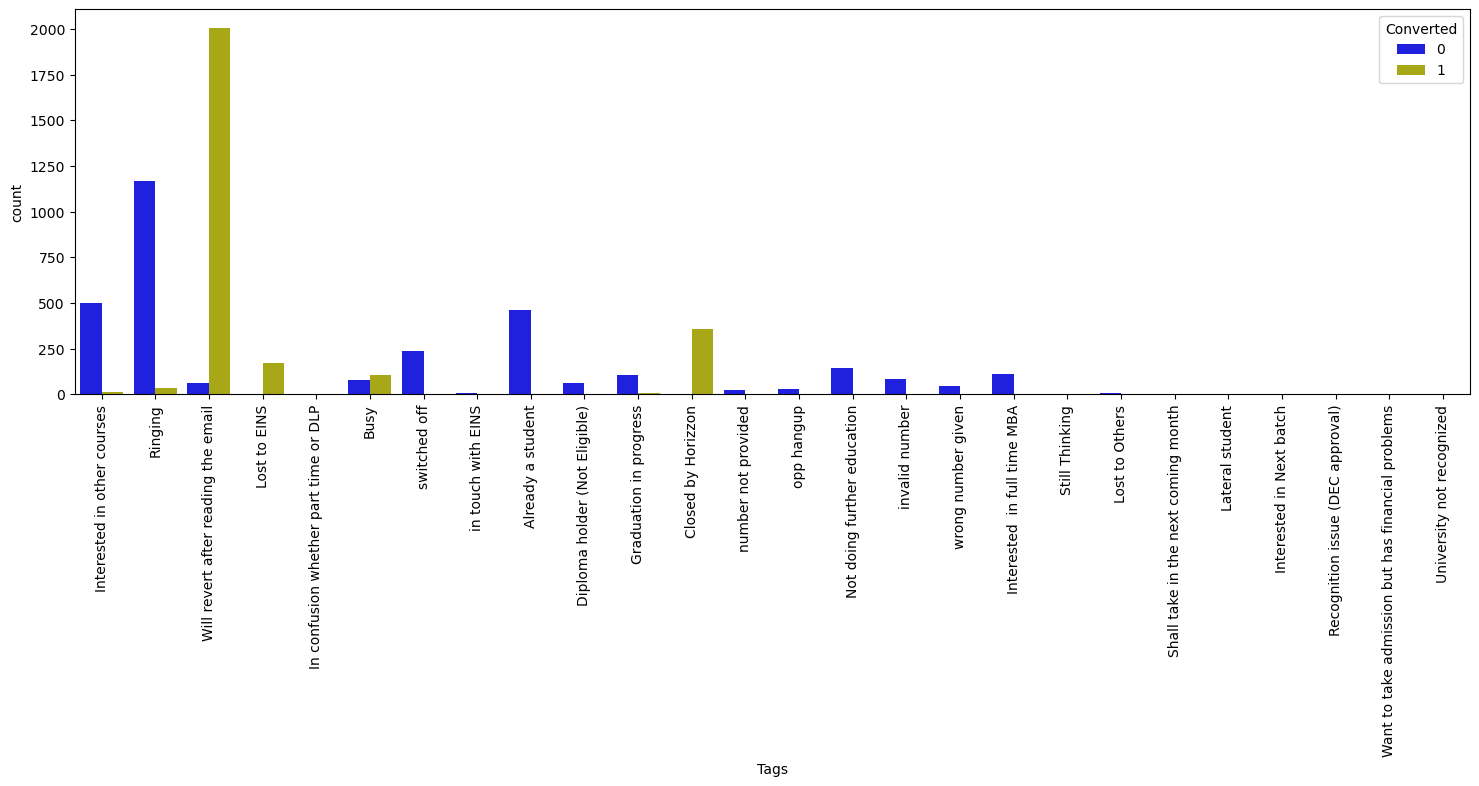

In [13]:
# Plot graph to check relation between categorical variables, with high percent of missing values, and target variable
for i in lead [["Lead Quality", "Asymmetrique Activity Index",
       "Asymmetrique Profile Index" ,"Tags"]] :
       plt.figure(figsize=[18,5])
       sns.countplot(x=lead[i], data=lead, hue="Converted",palette=['b','y'])
       plt.xticks(rotation=90)
       plt.show()


- Tags and read quality seem to have relevance with target variable. 
- So better to impute values rather than discarding the variables

In [14]:
# Discarding following variable -
lead = lead.drop(["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Profile Score", 
                  "Asymmetrique Activity Score","Prospect ID","Lead Number"], axis=1)

In [15]:
# Checking value count for each variable -
for i in lead.columns:
  print(f"""-------------{i}------------
{lead[i].astype("category").value_counts()}
""")

-------------Lead Origin------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

-------------Lead Source------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

-------------Do Not Email------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64

-------------Do Not Call------------
No     9238
Yes      

- There are columns which have very less variation in the classes. Hence it will not provide help in identifying the patterns in the data. Therefore we discard the values -


In [16]:
# Drop variable with heavy imbalance in the class -
lead = lead.drop(["Country","What matters most to you in choosing a course","Search",
       "Magazine","Newspaper Article","X Education Forums","Newspaper",
       "Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses",
       "Update me on Supply Chain Content","Get updates on DM Content",
       "I agree to pay the amount through cheque","Do Not Call"],axis=1)

- We observed Select class in many variables. This is as good as null values.
- First we will replace with null values and then impute the values.

In [17]:
# Replace select-
select = ["How did you hear about X Education","Specialization","Lead Profile","City"]
for i in select:
  lead[i].replace("Select",np.nan,inplace=True)

In [18]:
# Checking the null values again in the dataframe.
lead.isna().mean()

Lead Origin                               0.000000
Lead Source                               0.003896
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               0.014827
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.014827
Last Activity                             0.011147
Specialization                            0.365801
How did you hear about X Education        0.784632
What is your current occupation           0.291126
Tags                                      0.362879
Lead Quality                              0.515909
Lead Profile                              0.741883
City                                      0.397078
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

- The percentage of missing values for "How did you hear about X Education" and "Lead Profile" is above 60 % after replacing the "select" class with NaN values.
- Hence we will dicard both the values

In [19]:
# Dropping two more variables
lead.drop(["How did you hear about X Education","Lead Profile"], axis=1,inplace=True)

In [20]:
# Impute the missing values in same proportion as present values for categorical variable -
cat_impute = ["Lead Source","Specialization","What is your current occupation","Tags","Lead Quality","City"]

In [21]:
# Create a function to replace in proportion
def replace_with_proportion(frame, column):
    isnull = frame[column].isna()
    countframe = pd.DataFrame(data=frame[column].value_counts()).reset_index()
    countframe.columns = ["name","count"]
    countframe["proportion"] = countframe["count"]/countframe["count"].sum()
    fill_array = np.random.choice(a=countframe["name"],size=frame[column].isna().sum(),p=countframe["proportion"])
    frame.loc[isnull,column] = fill_array
    return frame

In [22]:
# Impute the values
for variable in cat_impute:
  replace_with_proportion(lead, variable)

In [23]:
# Check the percentage missing values -
lead.isna().mean() *100

Lead Origin                               0.000000
Lead Source                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Specialization                            0.000000
What is your current occupation           0.000000
Tags                                      0.000000
Lead Quality                              0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [24]:
# The pending missing values are less than 2 %, we can drop the rows -
lead.dropna(inplace=True)

In [25]:
# Check the missing values -
lead.isna().mean()

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
Lead Quality                              0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [26]:
#Checking the dimension of final dataframe.
lead.shape

(9103, 15)

# EDA

- Univariate Analysis -

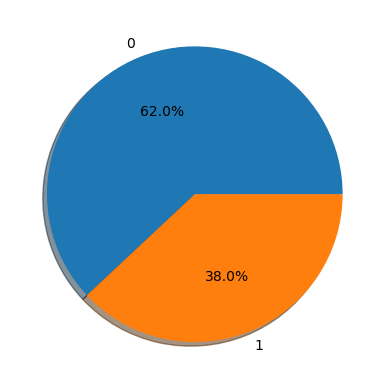

In [27]:
# Check the proportion of the target variable "Converted" -
plt.pie(lead["Converted"].value_counts(),labels = lead["Converted"].value_counts().index, 
        autopct='%1.1f%%',shadow=True)
plt.show()

- Data is balanced.

In [28]:
# Check the dataframe -
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Low in Relevance,Other Cities,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Operations Management,Unemployed,Ringing,Low in Relevance,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified


In [29]:
# Separate the categorical and continuous variable.
categorical = [i for i in lead.columns if lead[i].nunique() < 30]
categorical.remove("Converted")
continuous = [i for i in lead.columns if lead[i].nunique() >= 30]

In [30]:
# Create a function to plot the graph
def univariate_plot(data,predictor,target):
  plt.figure(figsize=[18,5])
  plt.subplot(1,2,1)
  sns.histplot(x=predictor, data=lead, hue=target, 
               shrink=0.8, multiple="dodge",log_scale=(False,True))
  plt.xticks(rotation=90)
  plt.subplot(1,2,2)
  data = lead[[predictor,target]].groupby(predictor).mean()
  sns.barplot(x=data.index,y=data[target])
  plt.xticks(rotation=90)
  return plt.show()

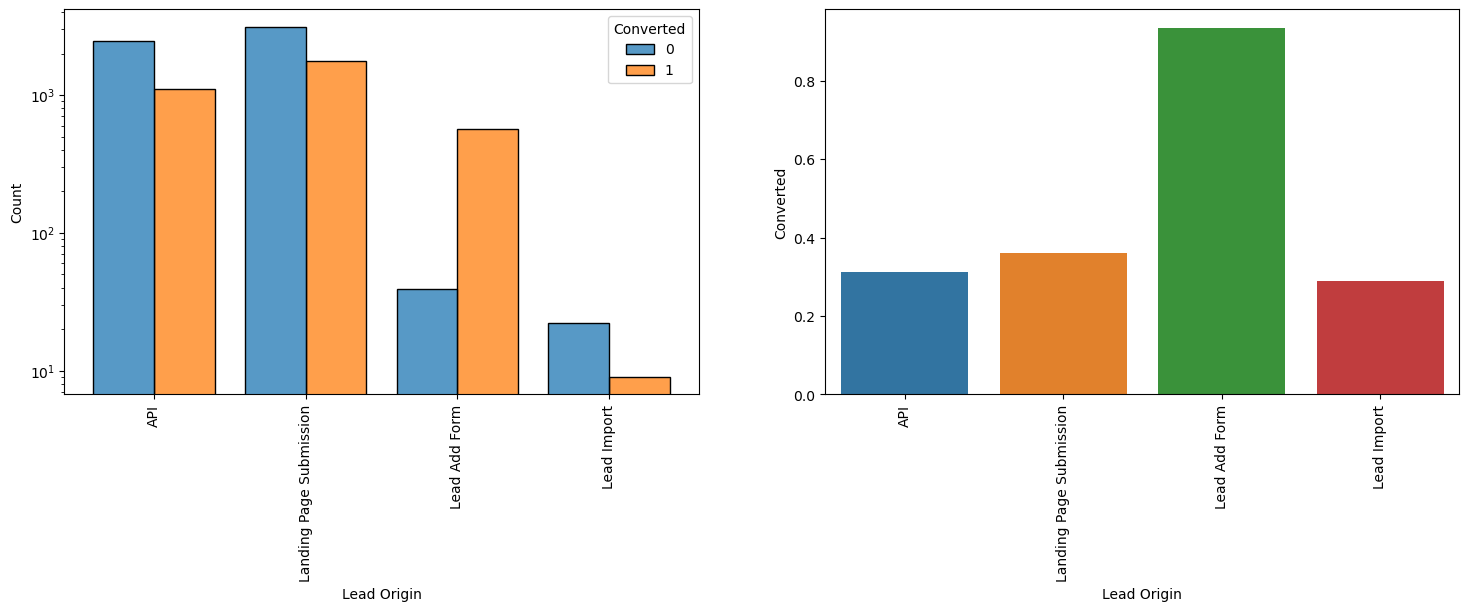

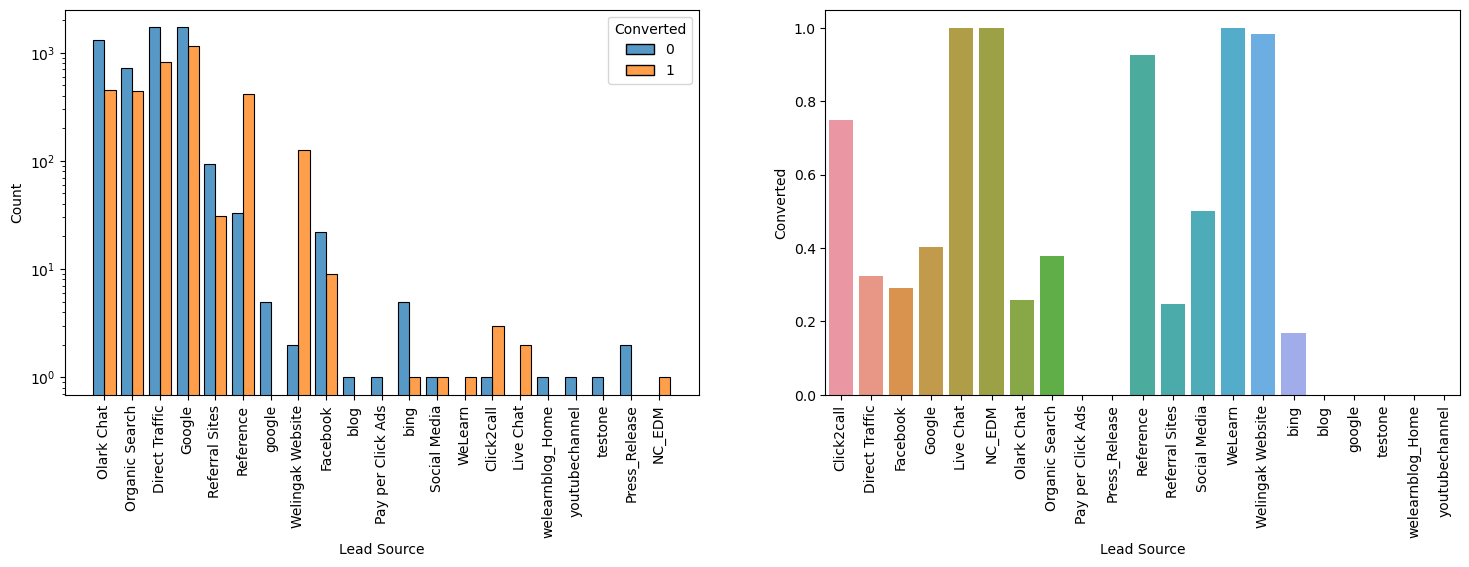

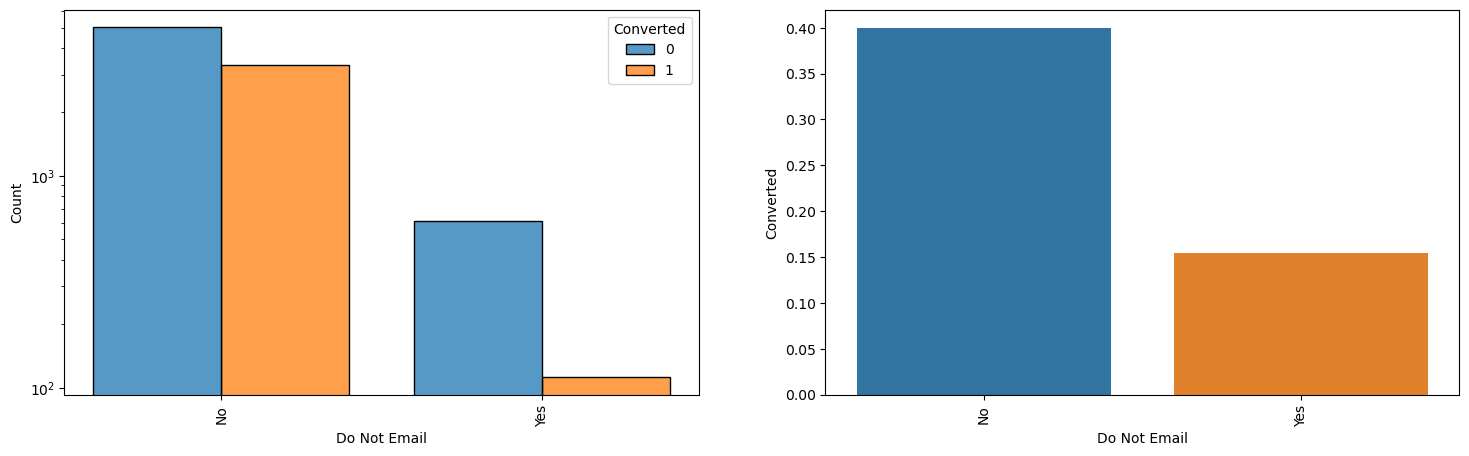

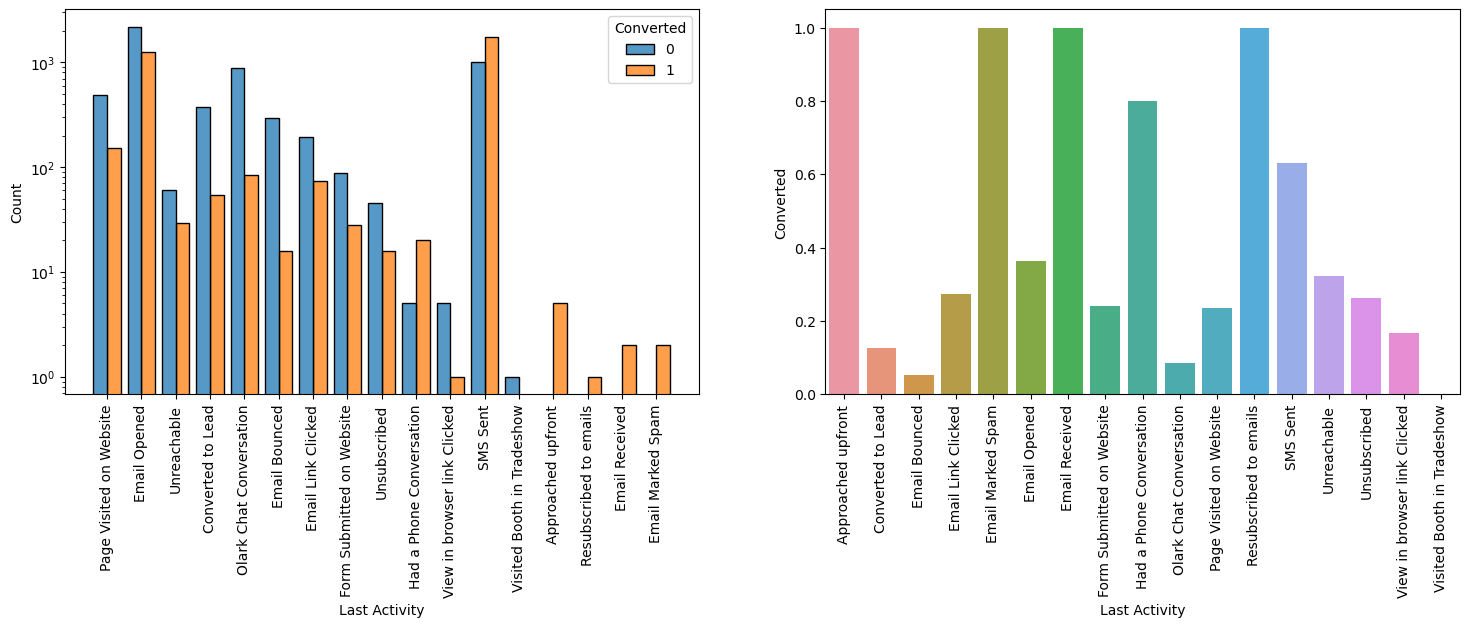

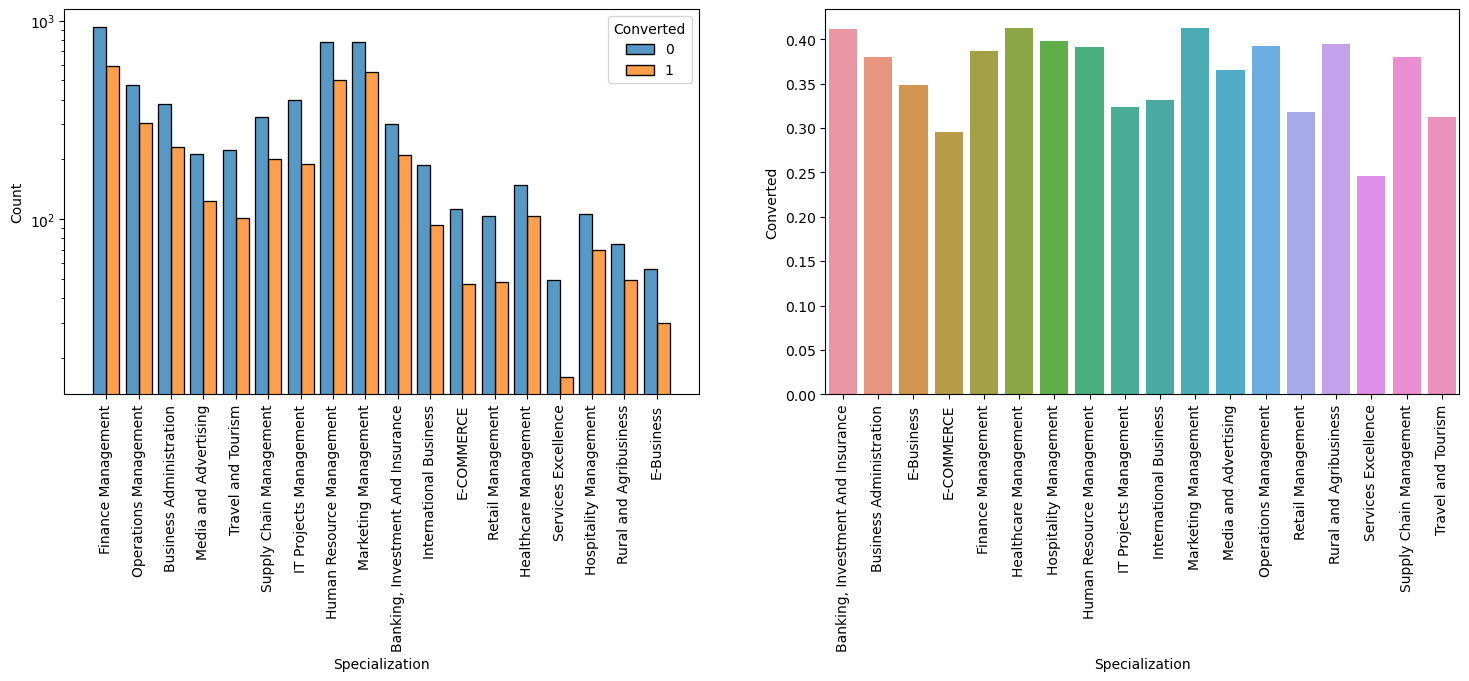

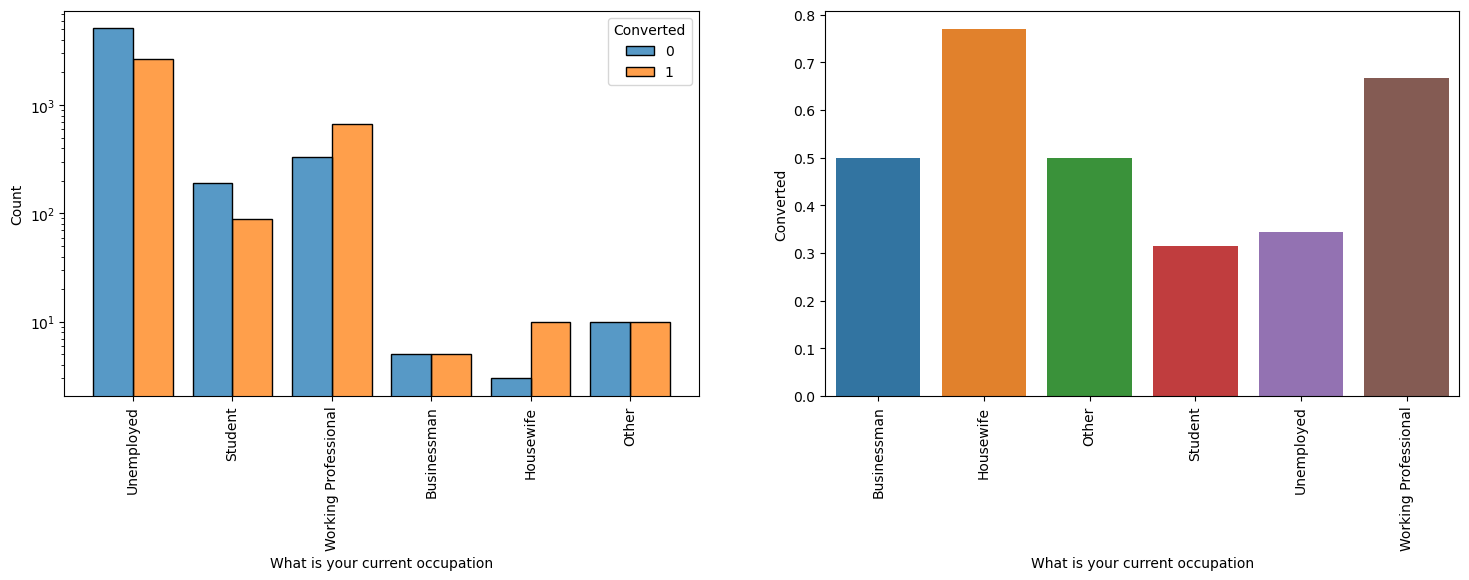

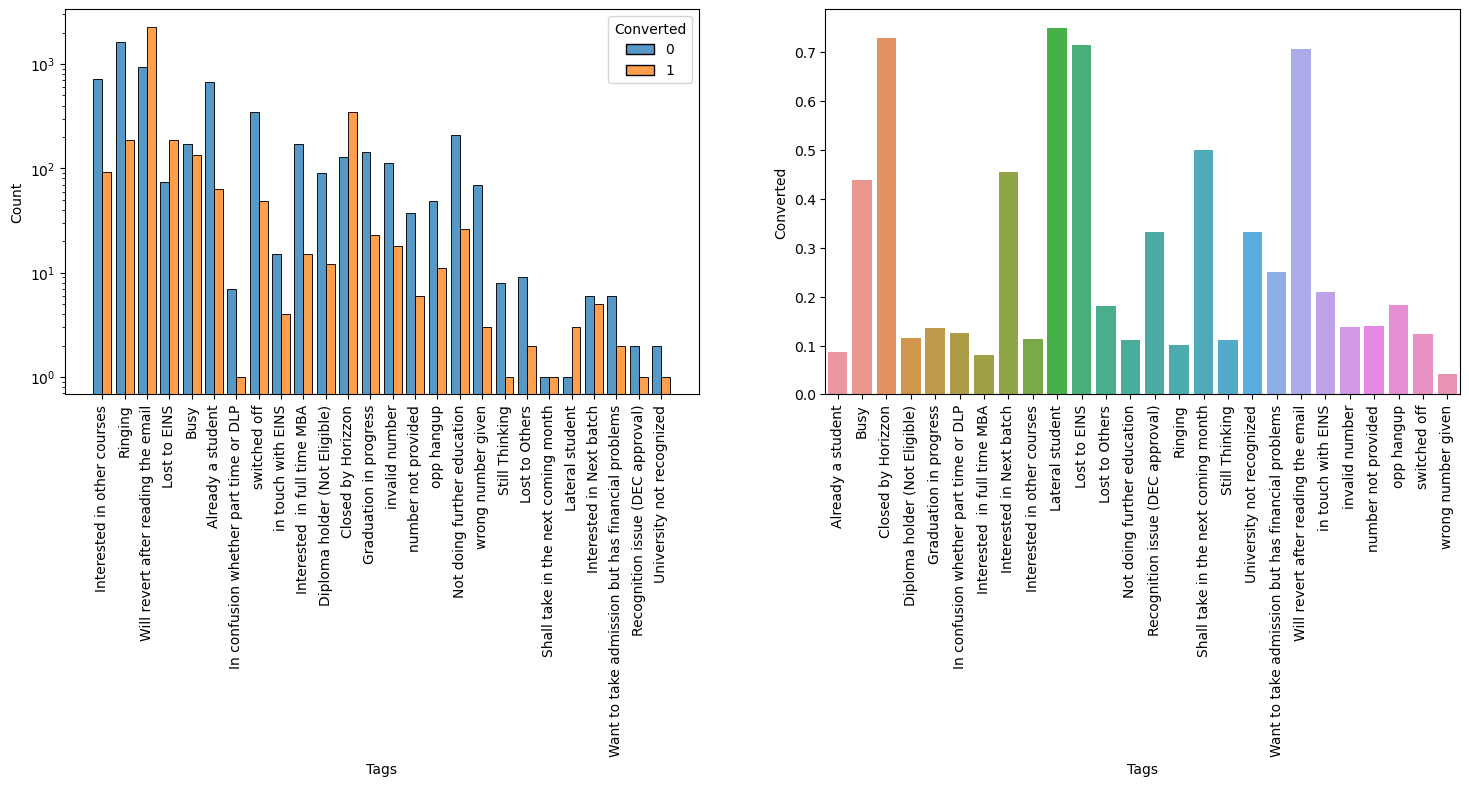

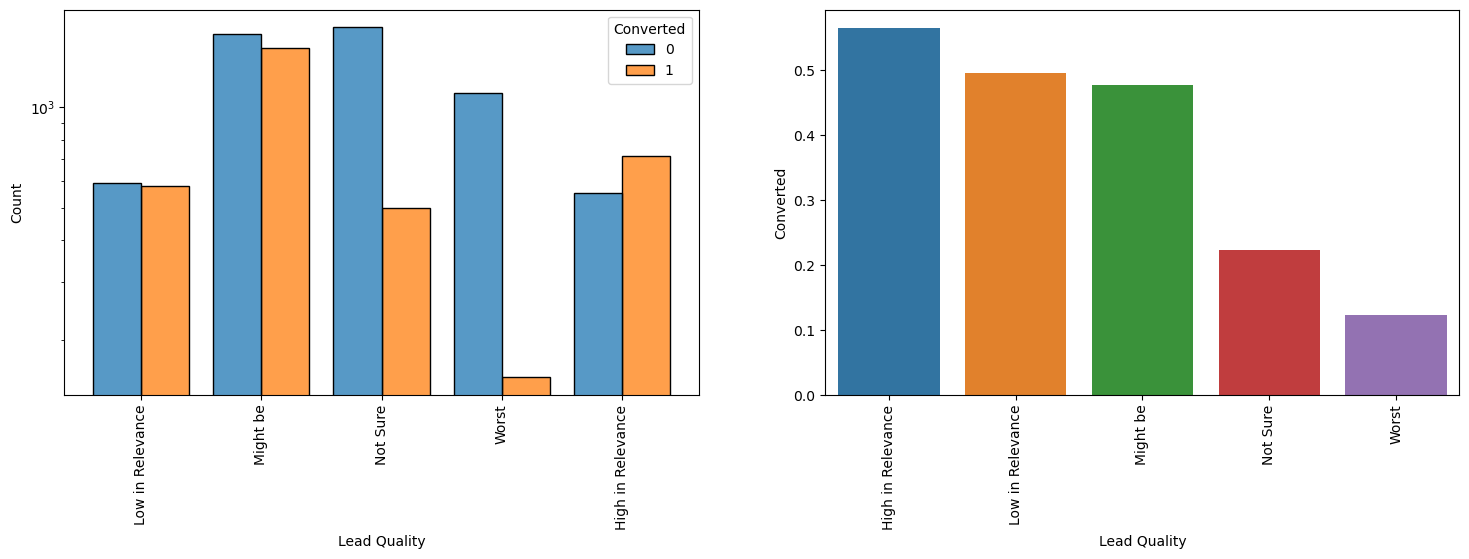

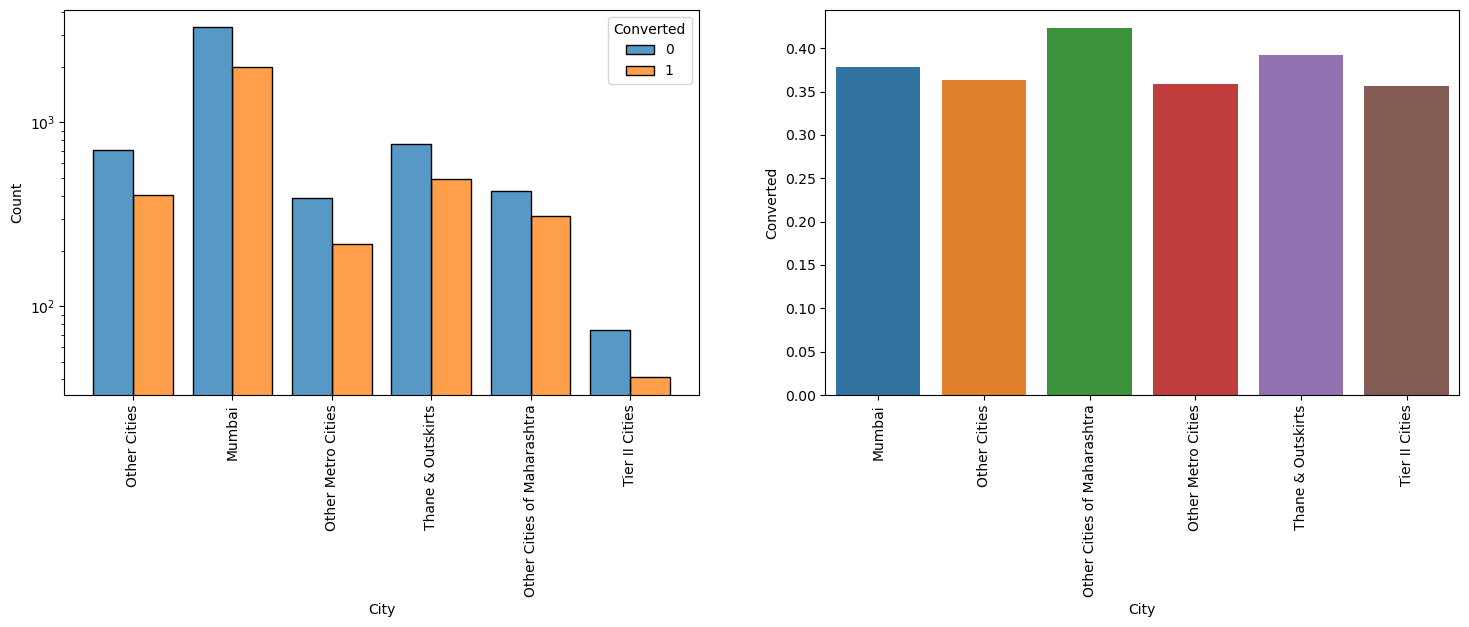

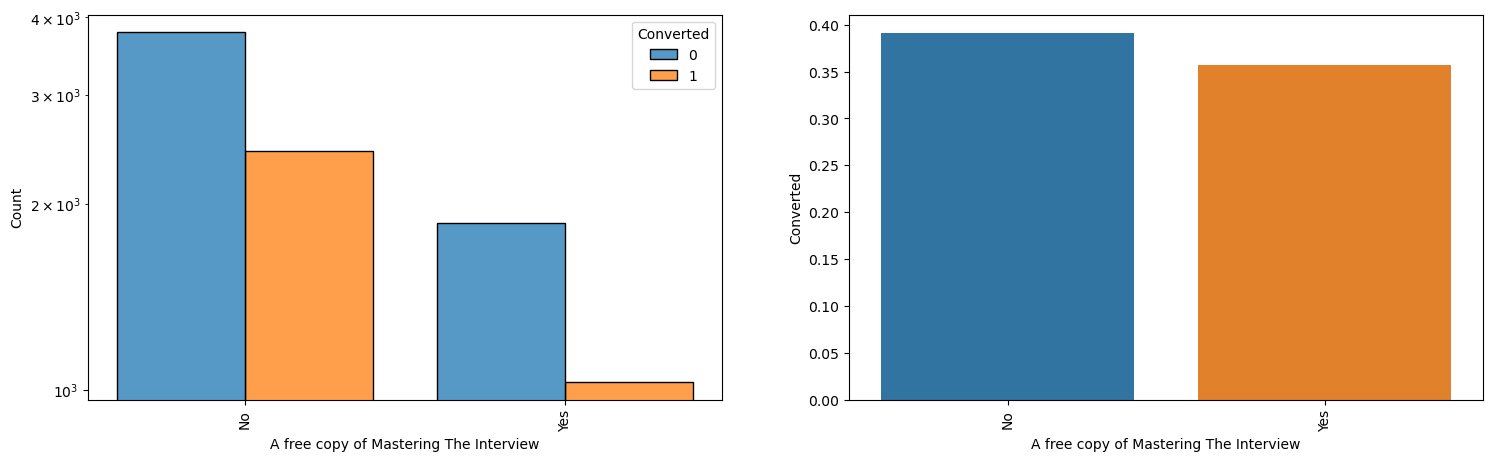

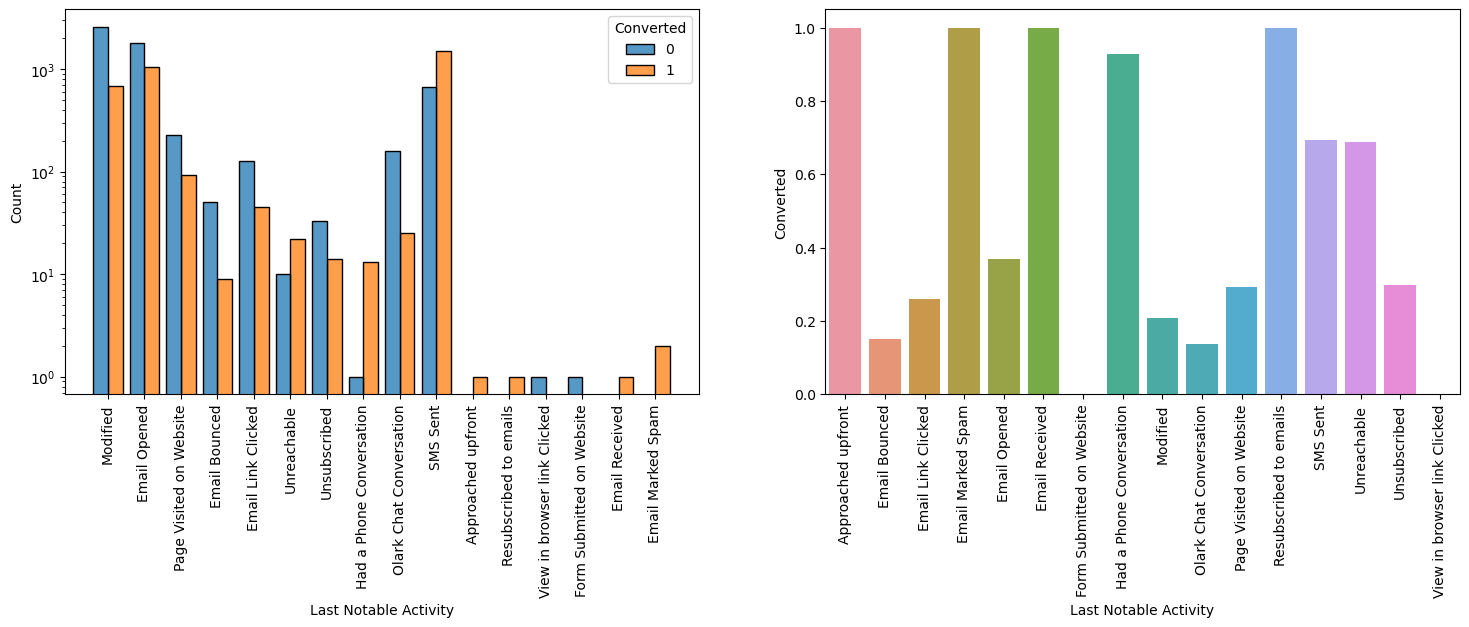

In [31]:
# Segmented Analysis with 
for i in categorical:
  univariate_plot(lead,i,"Converted")

- It is observed that "Last Activity" and "Last Notable Activity" have similar classes except "Modified". 
- Also the number of "Modified" data points are high. We are exactly unware about the importance of the class.
- Hence we will discard "Last Notable Activity"

In [32]:
lead.drop("Last Notable Activity",axis=1, inplace=True)

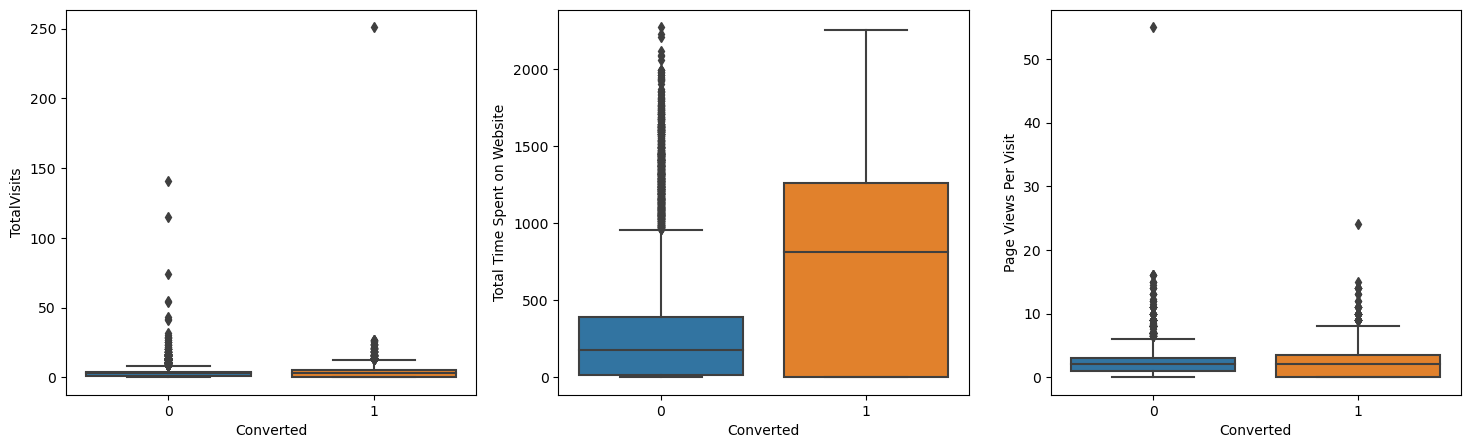

In [33]:
# Box plots for continuous varible
plt.figure(figsize=[18,5])
for i,j in enumerate(continuous):
  plt.subplot(1,3,i+1)
  sns.boxplot(data=lead,y= j, x="Converted")
plt.show()

- Bivariate Analysis

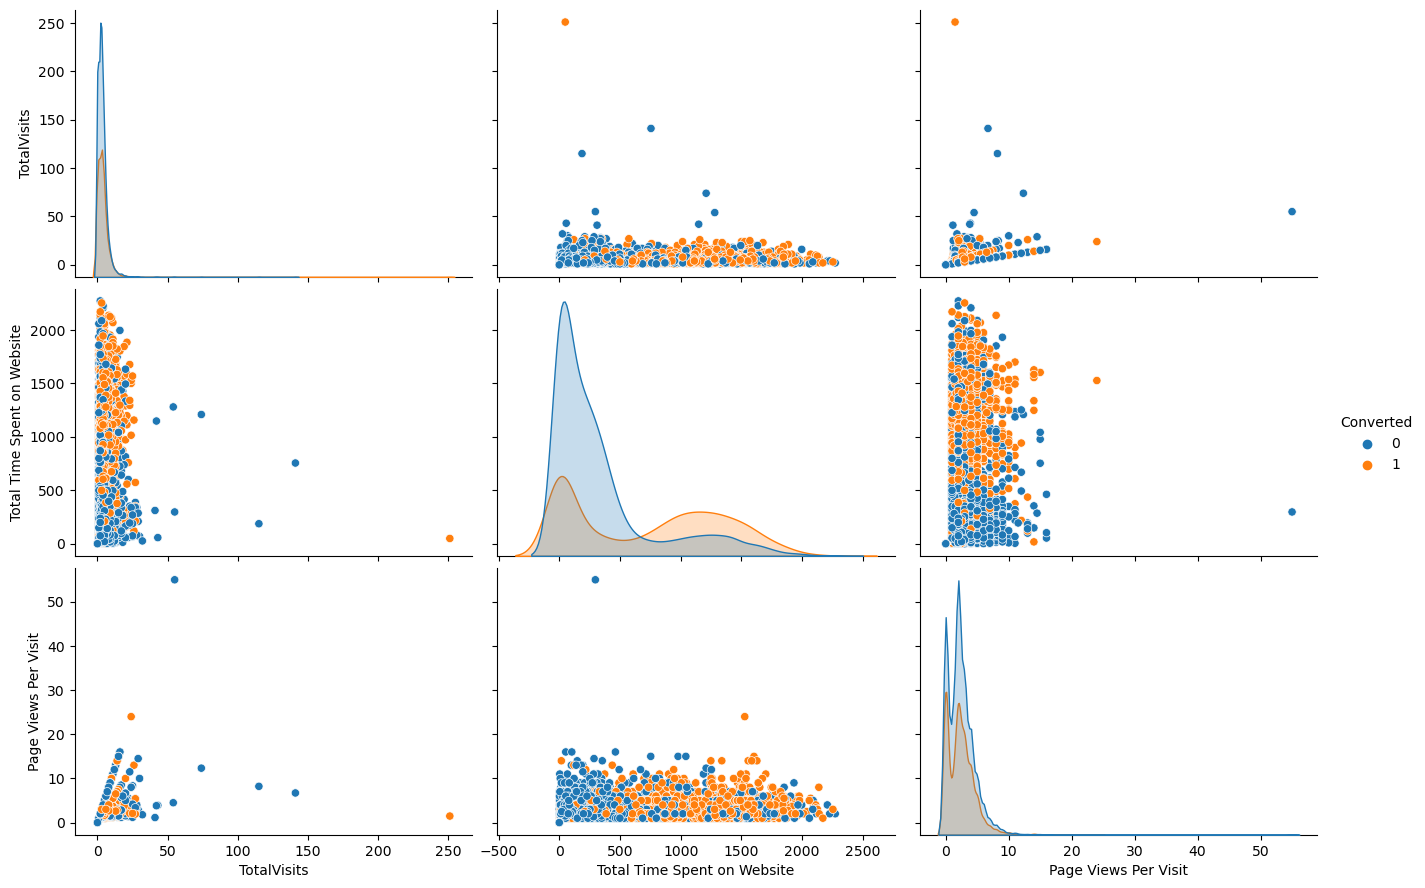

In [34]:
# Plot the pairplot for all the continuous variables -
sns.pairplot(lead,height=3,aspect=1.5 ,hue="Converted")
plt.show()

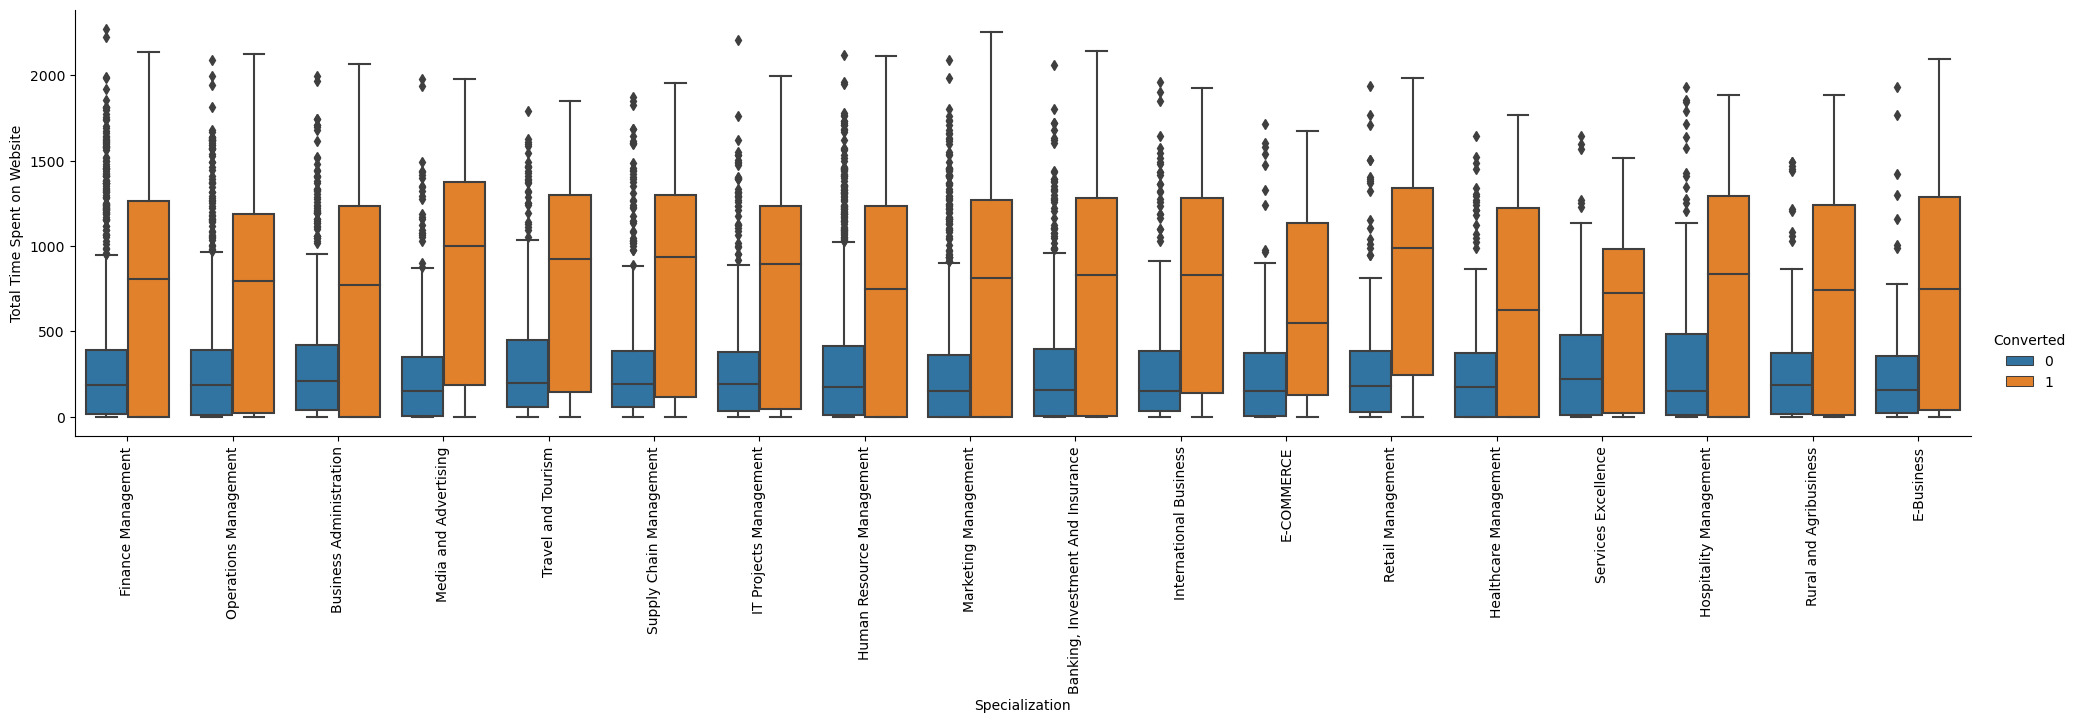

In [35]:
# Categorical VS Continuous -
sns.catplot(data=lead, x="Specialization", y="Total Time Spent on Website", 
            kind="box",hue="Converted",height=5,aspect=4)
plt.xticks(rotation=90)
plt.show()

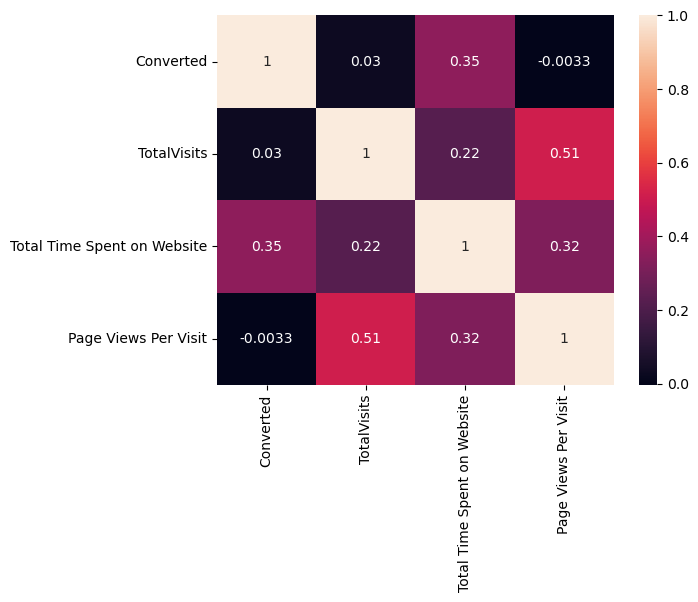

In [36]:
# Multivariate Analysis -
sns.heatmap(lead.corr(),annot=True)
plt.show()

# Modelling

In [37]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Low in Relevance,Other Cities,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Operations Management,Unemployed,Ringing,Low in Relevance,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Might be,Mumbai,No


## Data Preparation for Modelling

In [38]:
# Convert two class variable to binary feature -
list_01 = ["Do Not Email","A free copy of Mastering The Interview"]
for feature in list_01:
  lead[feature]=lead[feature].map({"Yes":1,"No":0})

In [39]:
# Get the dummies values for higher number of classes -
list_02 = [feature for feature in lead.columns if lead[feature].nunique() >2 and lead[feature].nunique() <30]
dummy = pd.get_dummies(lead[list_02],drop_first=True)

In [40]:
# Drop the columns for which dummies are created -
lead.drop(list_02,axis =1,inplace=True)

In [41]:
# Concat the two dataframe -
lead_df = pd.concat([lead,dummy],axis=1)
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
# See the correlations of the variable -
corr_df = lead_df.drop("Converted",axis=1)
corr_matrix = corr_df.corr().where(np.triu(np.ones(corr_df.corr().shape),k=1).astype(np.bool))
corr_df = corr_matrix.unstack().reset_index().dropna(subset=[0])
corr_df.columns = ["Var1","Var2", "Correlation"]
corr_df["Correlation"] = corr_df["Correlation"].abs()
corr_df.sort_values(by="Correlation",ascending=False,inplace=True)

In [43]:
corr_df.head()

,Var1,Var2,Correlation
907,Lead Source_Facebook,Lead Origin_Lead Import,0.967632
6564,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,0.852505
1706,Lead Source_Reference,Lead Origin_Lead Add Form,0.848425
2900,Last Activity_Email Bounced,Do Not Email,0.616344
804,Lead Source_Direct Traffic,A free copy of Mastering The Interview,0.594715


In [44]:
# Creating list for highly correlated variables - Greater than 0.9 -
list_corr = corr_df[corr_df["Correlation"]>0.9]["Var2"].to_list()

In [45]:
# Drop the same from the dataframe -
lead_df.drop(list_corr,axis=1,inplace=True)

In [46]:
# Perform Train-Test split
train, test = train_test_split(lead_df,train_size=0.7,random_state=100)
train.shape

(6372, 100)

In [47]:
# X and y split for training data set -
y_train = train.pop("Converted")
X_train = train
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7962,0,3.0,1286,1.5,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5520,0,7.0,60,7.0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1962,0,5.0,169,2.5,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1566,0,14.0,1241,3.5,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9170,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## Feature Scaling

In [48]:
continuous_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

scaler = StandardScaler()

X_train[continuous_var] = scaler.fit_transform(X_train[continuous_var])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7962,0,-0.092900,1.476324,-0.394072,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5520,0,0.695064,-0.771066,2.111481,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1962,0,0.301082,-0.571257,0.061483,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1566,0,2.074000,1.393834,0.517039,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9170,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [49]:
# Using RFE get the important features -
linear_class = LogisticRegression(random_state=50)
linear_fit = linear_class.fit(X_train,y_train)

In [50]:
# Select twenty important feature for training the model
rfe = RFE(estimator=linear_fit,n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)

In [51]:
# Columns to consider for first model -
cols = X_train.columns[rfe.support_]

In [52]:
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_number not provided',
       'Lead Quality_Not Sure', 'Lead Quality_Worst'],
      dtype='object')

In [53]:
cols = ['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_In confusion whether part time or DLP',
       'Tags_Interested in Next batch', 'Tags_Lost to EINS',
       'Tags_Lost to Others', 'Tags_Will revert after reading the email',
       'Tags_number not provided', 'Lead Quality_Worst']

## Model No 1

- Using the 20 Features received through RFE, we will build the first model

In [54]:
X_train_1 = X_train[cols]
X_train_1_sm = sm.add_constant(X_train_1)
Model_1 = sm.GLM(y_train,X_train_1_sm,family=sm.families.Binomial()).fit()
print(Model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.7
Date:                Mon, 17 Jul 2023   Deviance:                       4103.4
Time:                        12:13:25   Pearson chi2:                 6.35e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4953
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [55]:
# Checking the VIF
X = X_train_1
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] ,2)
vif.sort_values(by = "VIF", ascending = False,inplace = True)
vif

,features,VIF
5,Lead Source_Olark Chat,1.70
2,Lead Origin_Lead Add Form,1.66
17,Tags_Will revert after reading the email,1.54
9,Last Activity_SMS Sent,1.42
8,Last Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.37
6,Lead Source_Welingak Website,1.31
0,Do Not Email,1.15
12,Tags_Closed by Horizzon,1.13
19,Lead Quality_Worst,1.13


## Model No 2

Drop variable - Lead Source_NC_EDM - based on significance

In [56]:
# Build the Model -
cols.remove("Lead Source_NC_EDM")
X_train_1 = X_train[cols]
X_train_1_sm = sm.add_constant(X_train_1)
Model_2 = sm.GLM(y_train,X_train_1_sm,family=sm.families.Binomial()).fit()
print(Model_2.summary())

# Check the VIF -
X = X_train_1
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] ,2)
vif.sort_values(by = "VIF", ascending = False,inplace = True)
print("\n",vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2053.7
Date:                Mon, 17 Jul 2023   Deviance:                       4107.4
Time:                        12:13:27   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4950
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

## Model No 3

- Drop "Tags_Lost to Others"

In [57]:
# Build the model
cols.remove("Tags_Lost to Others")
X_train_1 = X_train[cols]
X_train_1_sm = sm.add_constant(X_train_1)
Model_3 = sm.GLM(y_train,X_train_1_sm,family=sm.families.Binomial()).fit()
print(Model_3.summary())

# Check VIF -
X = X_train_1
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] ,2)
vif.sort_values(by = "VIF", ascending = False,inplace = True)
print("\n",vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2053.7
Date:                Mon, 17 Jul 2023   Deviance:                       4107.5
Time:                        12:13:28   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4950
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

## Model No 4

Drop "Tags_number not provided" based on significance -

In [58]:
# Build the model
cols.remove("Tags_number not provided")
X_train_1 = X_train[cols]
X_train_1_sm = sm.add_constant(X_train_1)
Model_4 = sm.GLM(y_train,X_train_1_sm,family=sm.families.Binomial()).fit()
print(Model_4.summary())

# Check VIF -
X = X_train_1
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] ,2)
vif.sort_values(by = "VIF", ascending = False,inplace = True)
print("\n",vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.6
Date:                Mon, 17 Jul 2023   Deviance:                       4111.1
Time:                        12:13:29   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4947
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

## Model No 5

Drop Variable "Tags_In confusion whether part time or DLP" -

In [59]:
# Build the model
cols.remove("Tags_In confusion whether part time or DLP")
X_train_1 = X_train[cols]
X_train_1_sm = sm.add_constant(X_train_1)
Model_5 = sm.GLM(y_train,X_train_1_sm,family=sm.families.Binomial()).fit()
print(Model_5.summary())

# Check VIF -
X = X_train_1
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] ,2)
vif.sort_values(by = "VIF", ascending = False,inplace = True)
print("\n",vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.6
Date:                Mon, 17 Jul 2023   Deviance:                       4111.1
Time:                        12:13:30   Pearson chi2:                 6.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4947
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

# Model Evaluation

In [60]:
# Create the prediction dataframe -
predict_df = pd.DataFrame({"Student_id":y_train.index, "Converted":y_train, "Prob":Model_5.predict(X_train_1_sm)})
predict_df["Predicted"] = predict_df["Prob"].apply(lambda x : 1 if x > 0.5 else 0)
predict_df.head()

,Student_id,Converted,Prob,Predicted
7962,7962,0,0.565470,1
5520,5520,0,0.100157,0
1962,1962,0,0.118964,0
1566,1566,1,0.850629,1
9170,9170,0,0.059832,0


In [61]:
# Calculate the Accuracy -
metrics.accuracy_score(predict_df.Converted,predict_df.Predicted)

0.8618957940991839

In [62]:
# Finding evaluation parameter -
confusion_matrix = metrics.confusion_matrix(predict_df.Converted,predict_df.Predicted)

In [63]:
confusion_matrix

array([[3537,  416],
       [ 464, 1955]], dtype=int64)

In [64]:
TP=confusion_matrix[1,1]
TN=confusion_matrix[0,0]
FN=confusion_matrix[0,1]
FP=confusion_matrix[1,0]

In [65]:
# Sensitivity =
TP/float(TP+FN)

0.8245466048080978

In [66]:
# Specificity =
TN/float(TN + FP)

0.884028992751812

In [67]:
# False Positive Rate of the Model
FP/float(TN+FP)

0.11597100724818796

In [68]:
# Positive Predictive Value (Precision) -
TP/float(TP + FP)

0.8081852004960728

In [69]:
# Negative Predictive Value -
TN / float(TN + FN)

0.8947634707816848

## Plotting the ROC Curve

In [70]:
def draw_roc(actual,prob,a,b):
  FPR,TPR,Threshold = metrics.roc_curve(actual,prob
                                        ,drop_intermediate=False)
  auc_score = metrics.roc_auc_score(actual,prob)
  plt.figure(figsize=(a,b))
  plt.plot(FPR,TPR,label = f"ROC Curve (area={round(auc_score,2)})")
  plt.plot([0,1],[0,1],"--k")
  plt.xlim([0.0 , 1.0])
  plt.ylim([0.0 , 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right") 
  plt.show()
  return None

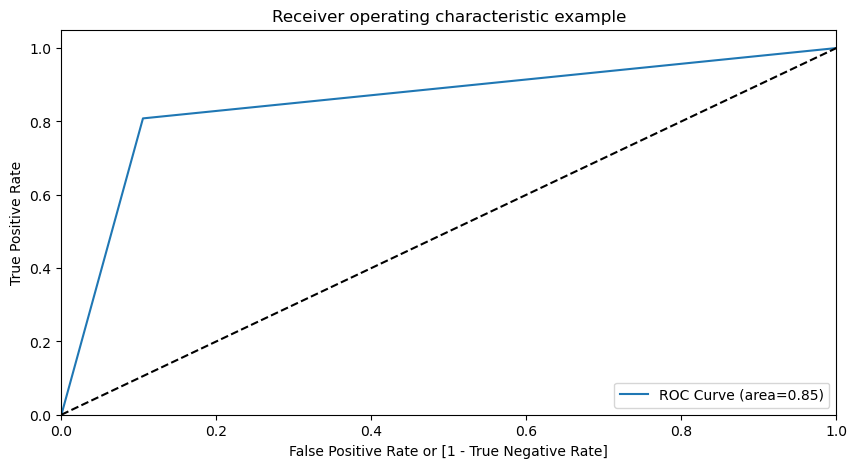

In [71]:
draw_roc(predict_df.Converted,predict_df.Predicted,10,5)

## Finding the opitmal cutoff -

In [72]:
number = [float(x)/10 for x in range(10)]
for i in number:
  predict_df[i] = predict_df["Prob"].map(lambda x:1 if x>i else 0)

In [73]:
predict_df.head()

,Student_id,Converted,Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7962,7962,0,0.565470,1,1,1,1,1,1,1,0,0,0,0
5520,5520,0,0.100157,0,1,1,0,0,0,0,0,0,0,0
1962,1962,0,0.118964,0,1,1,0,0,0,0,0,0,0,0
1566,1566,1,0.850629,1,1,1,1,1,1,1,1,1,1,0
9170,9170,0,0.059832,0,1,0,0,0,0,0,0,0,0,0


In [74]:
# Calculate the accuracy,sensitvity,secificity
cut_off = pd.DataFrame(columns=["prob","acc","sens","spec"])
for i in number :
  cm1 = metrics.confusion_matrix(predict_df.Converted,predict_df[i])
  TP = cm1[1,1]
  TN = cm1[0,0]
  FN = cm1[1,0]
  FP = cm1[0,1]
  acc = (TP+TN)/(TP+TN+FN+FP)
  # metrics.accuracy_score(df_pred.Churn, df_pred[i])
  sens = TP/(TP+FN)
  spec = TN/(TN+FP)
  cut_off.loc[i] = [i,acc,sens,spec]
print(cut_off)

     prob       acc      sens      spec
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.745763  0.957834  0.615988
0.2   0.2  0.818267  0.924349  0.753352
0.3   0.3  0.840395  0.894585  0.807235
0.4   0.4  0.856089  0.849111  0.860359
0.5   0.5  0.861896  0.808185  0.894763
0.6   0.6  0.864564  0.749897  0.934733
0.7   0.7  0.852950  0.689955  0.952694
0.8   0.8  0.827370  0.585779  0.975209
0.9   0.9  0.771030  0.410914  0.991399


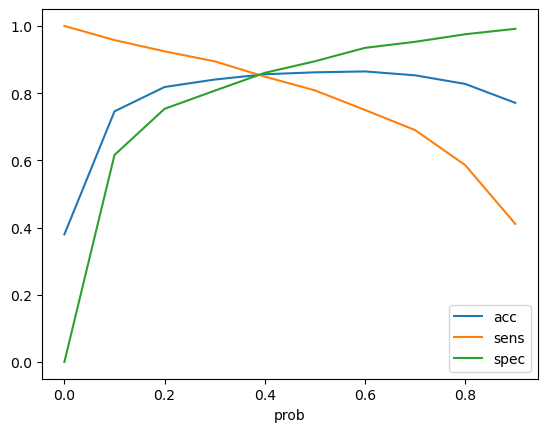

In [75]:
# Plot the curve for acc, sens, spec
cut_off.plot.line(x="prob",y=["acc","sens","spec"])
plt.show()

- We select 0.5 as the Cut-off

# Prediction on Test dataset

In [76]:
# X, y split for test data set -
y_test = test.pop("Converted")
X_test = test

In [77]:
#Fitting the scale to test data -
X_test[continuous_var] = scaler.transform(X_test[continuous_var])

In [78]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3504,0,-0.092900,-0.103815,0.289261,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4050,0,-0.683873,-0.881052,-1.077404,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7201,1,-0.289891,0.424120,-0.166294,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1196,0,0.104091,-0.105648,0.744816,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
8219,0,0.695064,-0.428274,-0.280183,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [79]:
X_test_sm = sm.add_constant(X_test[cols])

In [80]:
# Prepare the dataframe of predictions:
df_pred_test = pd.DataFrame({"Student_id":y_test.index,"Converted":y_test,"Prob":Model_5.predict(X_test_sm)})

# Use cut-off of 0.5
df_pred_test["Prediction"] = df_pred_test["Prob"].apply(lambda x:1 if x >= 0.5 else 0)
df_pred_test.head()

,Student_id,Converted,Prob,Prediction
3504,3504,0,0.053281,0
4050,4050,1,0.979705,1
7201,7201,0,0.093851,0
1196,1196,0,0.024469,0
8219,8219,1,0.602601,1


In [81]:
# Check the Accuracy -
metrics.accuracy_score(df_pred_test.Converted, df_pred_test.Prediction)

0.8667154888319297

In [82]:
# Confusion metrics for test dataset -
confusion_matrix_1 = metrics.confusion_matrix(df_pred_test.Converted,df_pred_test.Prediction)

In [83]:
confusion_matrix_1

array([[1518,  171],
       [ 193,  849]], dtype=int64)

In [84]:
TP_1=confusion_matrix_1[1,1]
TN_1=confusion_matrix_1[0,0]
FN_1=confusion_matrix_1[0,1]
FP_1=confusion_matrix_1[1,0]

In [85]:
# Check the other metrics
print(f"Sensitivity     = {TP_1/(TP_1+FN_1)}")
print(f"Specificity     = {TN_1/(TN_1+FP_1)}")
print(f"Recall          = {TP_1/float(TP_1+FN_1)}")
print(f"Precision       = {TP_1/float(TP_1+FP_1)}")

Sensitivity     = 0.8323529411764706
Specificity     = 0.8872004675628288
Recall          = 0.8323529411764706
Precision       = 0.8147792706333973


# Interpretation of Model

In [86]:
# Feature and its importance -
print("------------Feature-------------------------Importance-------")
print(Model_5.params)

------------Feature-------------------------Importance-------
const                                      -2.762554
Do Not Email                               -1.366616
Total Time Spent on Website                 1.106510
Lead Origin_Lead Add Form                   3.262158
Lead Source_Facebook                        1.277989
Lead Source_Olark Chat                      0.982923
Lead Source_Welingak Website                3.115622
Last Activity_Converted to Lead            -1.221577
Last Activity_Olark Chat Conversation      -1.612045
Last Activity_SMS Sent                      1.392381
Last Activity_Unsubscribed                  1.283164
Tags_Busy                                   1.420270
Tags_Closed by Horizzon                     3.103382
Tags_Interested in Next batch               1.684179
Tags_Lost to EINS                           3.652757
Tags_Will revert after reading the email    2.959806
Lead Quality_Worst                         -0.806140
dtype: float64


### CONCLUSION

- The final Model contains 16 features
- Optimum cut off is chosen to be 0.5
-  Any lead with greater than 0.5 probability of converting is predicted as Hot Lead (customer will convert) and that with 0.5 or less probability is predicted as Cold Lead (customer will not convert)




